# Matplotlib

O módulo matplotlib é uma extensa biblioteca de funções para a confecção de gráficos de qualidade que tem como objetivo ser de fácil uso sem sacrificar versatilidade e qualidade.

A facilidade de seu uso pode ser vista no mínimo que é necessário para desenhar um gráfico.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

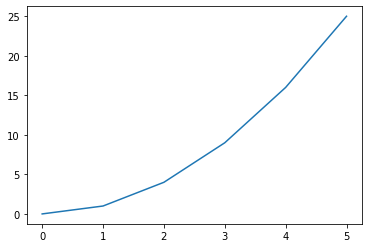

In [5]:
plt.plot([x**2 for x in range(6)])

## Conceitos básicos

Matplotlib é bastante integrado com Numpy, de modo que podemos plotar arrays de Numpy facilmente.

[0.   0.05 0.1  0.15 0.2 ]


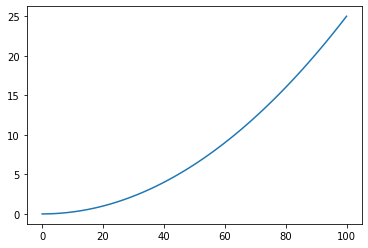

In [14]:
xs = np.linspace(0, 5, 101)
plt.plot(xs*xs)
print(xs[:5])

Nos exemplos acima não estávamos interessados na coordenada $x$.  Podemos entretanto passar um vetor de mesma dimensão que $y$ para que matplotlib o use como a coordenada $x$.  A função `plot`  também aceita alguns argumentos para customizar a curva.

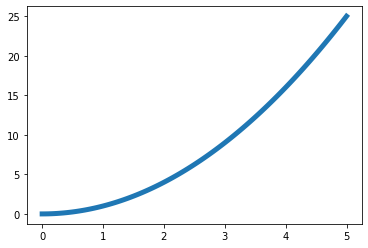

In [19]:
# Observe o uso do parâmetro linewidth para especificar a espessura da curva
# desenhada
plt.plot(xs, xs*xs, linewidth=5)

Para customizar as cores e a forma da curva, podemos usar uma notação compacta.  Esta notação é descrita na [documentação](file:///usr/share/doc/python-matplotlib-doc/html/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) da função `plot()` do submódulo `pyplt` do matplotlib.

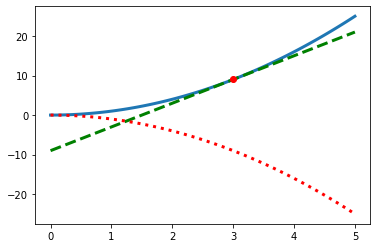

In [36]:
xs, a, b = np.linspace(0, 5, 100), 6, -9
ys1, ys2 = xs*xs, a*xs + b
plt.plot(xs, ys1, linewidth=3)
plt.plot(xs, ys2, "g--", linewidth=3)
plt.plot([3], [9], "ro")
plt.plot(xs, -xs*xs, "r:", linewidth=3)

As várias curvas podem ser traçadas com uma única chamada à função `plot()`.

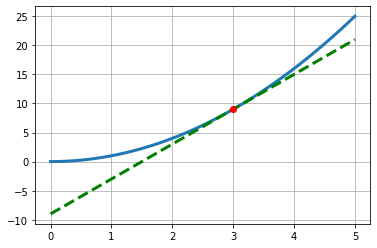

In [37]:
plt.plot(xs, ys1, xs, ys2, "g--", [3], [9], "ro", linewidth=3)
plt.grid(True)  # Use isso para mostrar um grid

Observe que a função `plot()` retorna objetos do tipo `Line2D`.  Estes objetos podem ser manipulados para modificar as características da curva correspondente.  Podemos inclusive mudar os próprios pontos da curva.  Consulte a [documentação](file:///usr/share/doc/python-matplotlib-doc/html/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) desta classe para ver todas as características que podem ser mudadas.

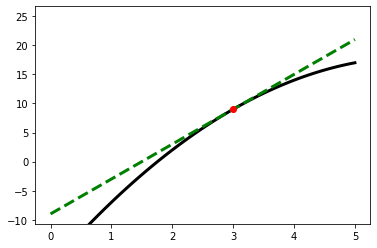

In [39]:
c1, c2, c3 = plt.plot(xs, ys1, xs, ys2, "g--", [3], [9], "ro", linewidth=3)
c1.set_color("black")
c1.set_data(xs, -xs*xs + 12*xs - 18)

Ao invés de gráficos na tela, podemos salvar as figuras em um arquivo.  O formato da figura será deduzido do nome do arquivo ou através do parâmetro .

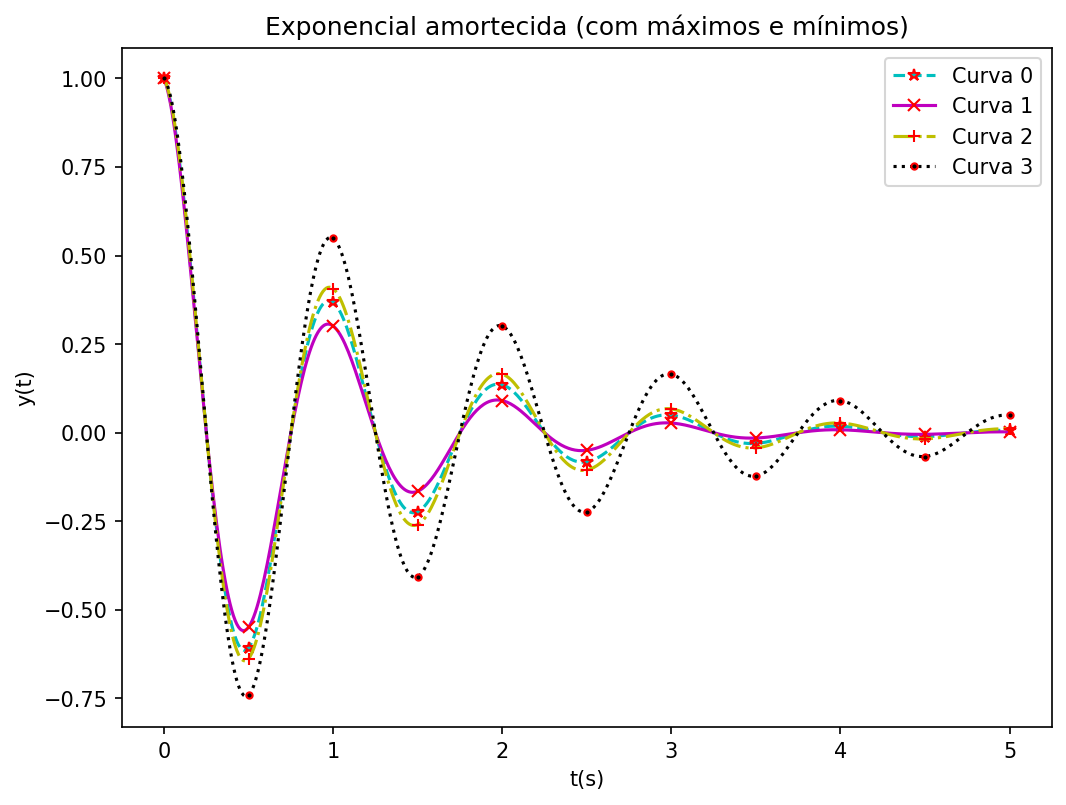

In [49]:
# Crie uma figura de tamanho 8 pol por 6 pol
t = np.linspace(0, 5, 501)
y = np.exp(-t)*np.cos(2*np.pi*t)
y1 = np.exp(-1.2*t)*np.cos(2*np.pi*t)
y2 = np.exp(-0.9*t)*np.cos(2*np.pi*t)
y3 = np.exp(-0.6*t)*np.cos(2*np.pi*t)

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(t, y, "c*--", label="Curva 0", markevery=50, markeredgecolor="red")
plt.plot(t, y1, "mx-", label="Curva 1", markevery=50, markeredgecolor="red")
plt.plot(t, y2, "y+-.", label="Curva 2",  markevery=50, markeredgecolor="red")
plt.plot(t, y3, "k.:", label="Curva 3", markevery=50, markeredgecolor="red")
plt.title("Exponencial amortecida (com máximos e mínimos)")
plt.xlabel("t(s)")
plt.ylabel("y(t)")
plt.legend()
plt.savefig("teste.png")

### Textos descritivos

Podemos tornar os nossos gráficos mais descritivos adicionando um título à figura e rótulos aos eixos.

Text(0, 0.5, 'y(t)')

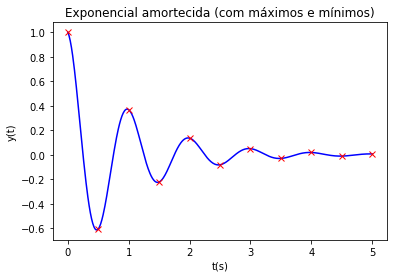

In [50]:
plt.plot(t, y, "bx-", markevery=50, markeredgecolor="red")
plt.title("Exponencial amortecida (com máximos e mínimos)")
plt.xlabel("t(s)")
plt.ylabel("y(t)")

Além disso, podemos colocar uma legenda na figura e algumas anotações.

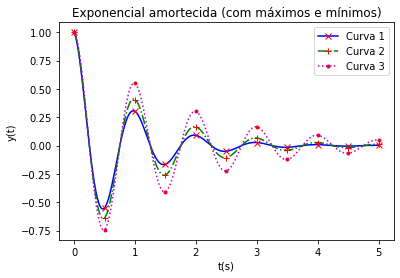

In [51]:
plt.plot(t, y1, "bx-", label="Curva 1", markevery=50, markeredgecolor="red")
plt.plot(t, y2, "g+-.", label="Curva 2",  markevery=50, markeredgecolor="red")
plt.plot(t, y3, "m.:", label="Curva 3", markevery=50, markeredgecolor="red")
plt.title("Exponencial amortecida (com máximos e mínimos)")
plt.xlabel("t(s)")
plt.ylabel("y(t)")
plt.legend()

O Matplotlib também permite que coloquemos anotações no meio do gráfico.  Isto é bastante útil quando queremos chamara a atenção para algum ponto específico do gráfico.

Text(1.6, 1, 'Função\nseno')

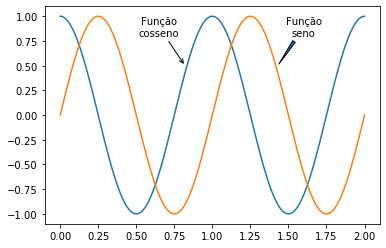

In [57]:
t = np.linspace(0, 2, 401)
y1, y2 = np.cos(2*np.pi*t), np.sin(2*np.pi*t)
plt.plot(t, y1, t, y2)
plt.annotate("Função\ncosseno", xy=(0.82, 0.5), xytext=(0.65, 1), ha="center", va="top", 
             arrowprops=dict(arrowstyle="->"))
plt.annotate("Função\nseno", xy=(1.43, 0.5), xytext=(1.6, 1), ha="center", va="top", 
             arrowprops=dict(arrowstyle="wedge"))

## Múltiplos gráficos

Podemos também mostrar vários gráficos em uma única imagem usando a função `subplot()`.

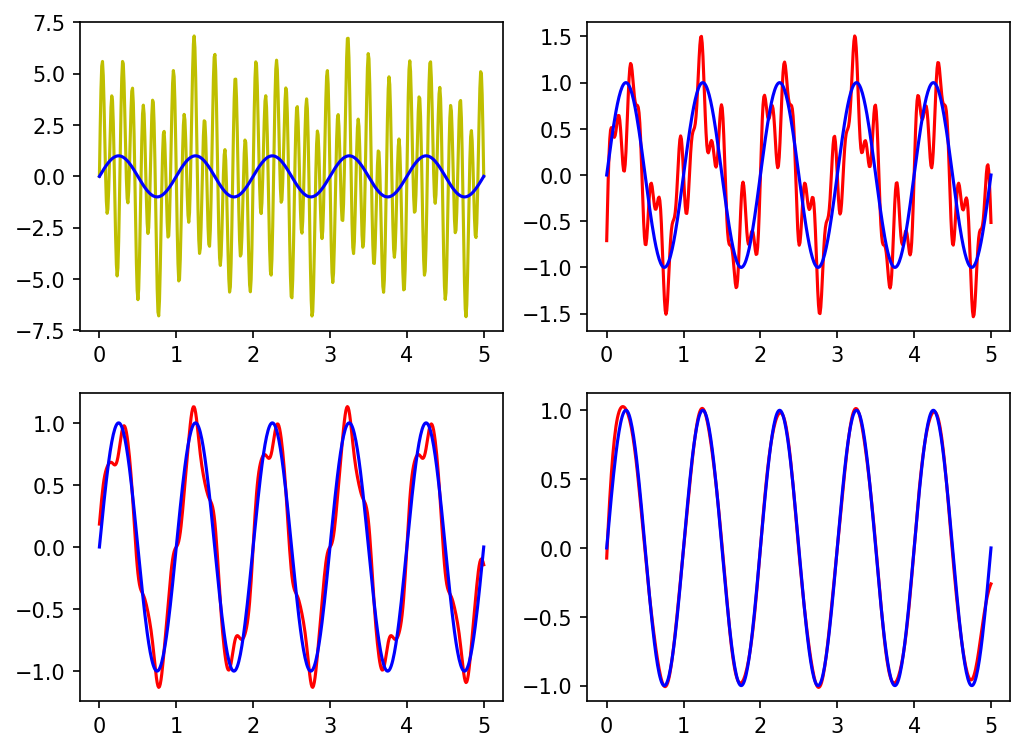

In [60]:
import scipy.signal as signal

N_PONTOS = 500

t = np.linspace(0, 5, N_PONTOS)
y = np.sin(2*np.pi*t)
y2 = y + 2*np.sin(7*np.pi*t) + 4*np.sin(15*np.pi*t)
b1, a1 = signal.butter(1, Wn=0.04, btype="lowpass")
y_bw1 = signal.filtfilt(b1, a1, y2)
b2, a2 = signal.butter(2, Wn=0.04, btype="lowpass")
y_bw2 = signal.filtfilt(b2, a2, y2)
b4, a4 = signal.butter(4, Wn=0.04, btype="lowpass")
y_bw4 = signal.filtfilt(b4, a4, y2)

plt.figure(figsize=(8, 6), dpi=150)
plt.subplot(221)
plt.plot(t, y2, "y", t, y, "b")
plt.subplot(222)
plt.plot(t, y_bw1, "r", t, y, "b")
plt.subplot(223)
plt.plot(t, y_bw2, "r", t, y, "b")
plt.subplot(224)
plt.plot(t, y_bw4, "r", t, y, "b")

## Outros tipos de gráficos

Matplotlib possui vários outros tipos de gráficos além dos que já vimos.  Por exemplo, podemos plotar gráficos semilog ou loglog.

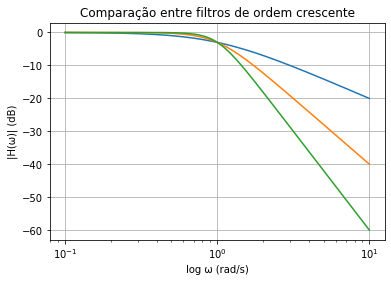

In [61]:
# Gráfico de Bode de um filtro-protótipo Butterworth passa-baixa de 1a, 2a e 3a ordem
w = np.logspace(-1, 1, 501)
H1_mag = 20*np.log10(np.abs(1/(1j*w + 1)))
H2_mag = 20*np.log10(np.abs(1/((1j*w)**2 + 1j*np.sqrt(2)*w + 1)))
H3_mag = 20*np.log10(np.abs(1/((1j*w)**2 + 1j*w + 1)/(1j*w + 1)))
plt.semilogx(w, H1_mag, w, H2_mag, w, H3_mag)
plt.title("Comparação entre filtros de ordem crescente")
plt.xlabel("log ω (rad/s)")
plt.ylabel("|H(ω)| (dB)")
plt.grid()

Um gráfico bastante útil quando queremos ver a distribuição de pontos $(x, y)$ é o `plt.scatter()`.

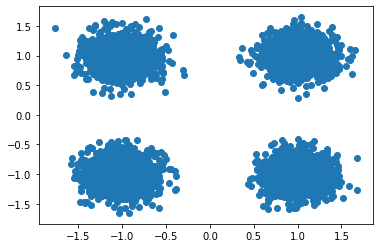

In [70]:
N, SIGMA = 5000, 0.2
constelacao = [(1, 1), (-1, 1), (-1, -1), (1, -1)]
transmitidos = np.array([constelacao[idx] for idx in np.random.choice(4, size=N)])
ruido = SIGMA*np.random.randn(N, 2)
recebidos = transmitidos + ruido
plt.scatter(*recebidos.T)


Usamos o gráfico histograma quando queremos ver a concentração de números reais.

Text(0.5, 1.0, 'Ruído em y')

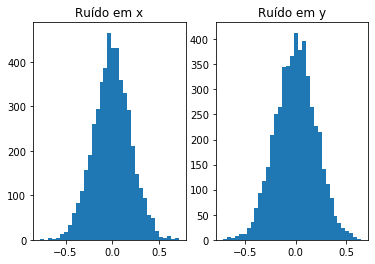

In [71]:
plt.subplot(121)
plt.hist(ruido.T[0], bins=35)
plt.title("Ruído em x")
plt.subplot(122)
plt.hist(ruido.T[1], bins=35)
plt.title("Ruído em y")